In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("wine.csv")

In [3]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [4]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X=df.iloc[:,1:].values

In [6]:
#feautre scaling important for deep learning
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

In [14]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(x)
#X_test= pca.transform(X_test_std)


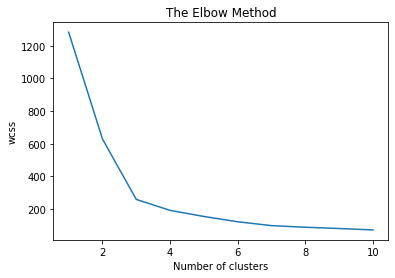

In [8]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) #calculates the within cluster sum of square
                  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(X_train)
print(y_means)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


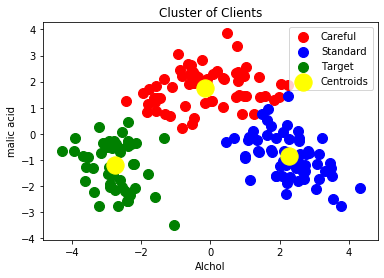

In [12]:
plt.scatter(X_train[y_means==0,0],X_train[y_means==0,1],s=100,c='red',label='Careful')
plt.scatter(X_train[y_means==1,0],X_train[y_means==1,1],s=100,c='blue',label='Standard')
plt.scatter(X_train[y_means==2,0],X_train[y_means==2,1],s=100,c='green',label='Target')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Alchol')
plt.ylabel('malic acid')
plt.legend()
plt.show()

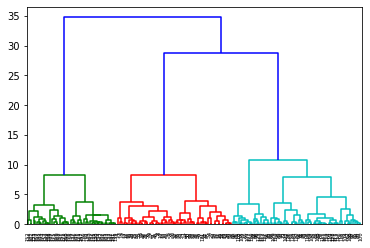

In [13]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X_train, method= 'ward', metric = 'euclidean'))

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters  = 3)

cluster.fit(X_train)
Y_pred_dend = cluster.fit_predict(X_train)

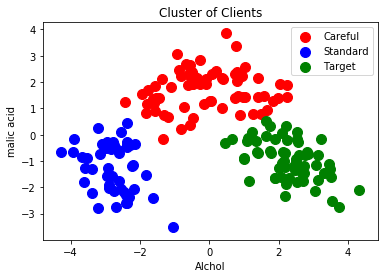

In [24]:
plt.scatter(X_train[Y_pred_dend==0,0],X_train[Y_pred_dend==0,1],s=100,c='red',label='Careful')
plt.scatter(X_train[Y_pred_dend==1,0],X_train[Y_pred_dend==1,1],s=100,c='blue',label='Standard')
plt.scatter(X_train[Y_pred_dend==2,0],X_train[Y_pred_dend==2,1],s=100,c='green',label='Target')

plt.title('Cluster of Clients')
plt.xlabel('Alchol')
plt.ylabel('malic acid')
plt.legend()
plt.show()